<a href="https://colab.research.google.com/github/relmarrakchy/Cyber-Threat-Detection/blob/master/Cyber_threat_detection_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cyber threat detecetion notebook - Author : ELMARRAKCHY Reda


---



> In today's interconnected digital world, cyber threats pose significant risks to individuals, organizations, and even nations. Cyber threat detection is the practice of identifying and mitigating potential cyber threats, including malware, hacking attempts, phishing attacks, and other malicious activities, before they can cause harm.

In this Python notebook, we'll try to make a cyber threat detection model using Python libraries such as pandas, scikit-learn, and TensorFlow. Let's dive in!

## I - Importing libraries and loading the dataset :

Importing libraries :

In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Loading the dataset :

In [127]:
from google.colab import drive
drive.mount('/content/drive')

dataset = pd.read_csv("/content/drive/MyDrive/datasets/cyberthreat_dataset.csv")

dataset.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Protocol,Flag,Packet,Sender ID,Receiver ID,Source IP Address,Destination IP Address,Source Port,Destination Port,Packet Size,Target Variable
0,TCP,SYN,SSH,789012,345678,192.168.1.10,10.0.0.8,22,12345,256,Man-in-the-Middle
1,UDP,ACK,NTP,345678,789012,10.0.0.5,192.168.1.10,123,12345,128,DDoS
2,TCP,RST,FTP,234567,456789,192.168.0.5,10.0.0.10,20,12345,2048,SQL Injection
3,UDP,ACK,SNMP,456789,234567,10.0.0.8,192.168.0.5,161,12345,768,Cross-Site Scripting
4,TCP,FIN,HTTPS,890123,567890,192.168.1.5,10.0.0.2,443,12345,4096,Ransomware


## II - Discovering our dataset :

In [128]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Protocol                378 non-null    object
 1   Flag                    378 non-null    object
 2   Packet                  378 non-null    object
 3   Sender ID               378 non-null    int64 
 4   Receiver ID             378 non-null    int64 
 5   Source IP Address       378 non-null    object
 6   Destination IP Address  378 non-null    object
 7   Source Port             378 non-null    int64 
 8   Destination Port        378 non-null    int64 
 9   Packet Size             378 non-null    int64 
 10  Target Variable         378 non-null    object
dtypes: int64(5), object(6)
memory usage: 32.6+ KB


It appears that our dataset contains information regarding previous cyber attacks on an organizational network. To enhance our ability to detect cyber threats, I will focus on utilizing the following features: "Protocol", "Flag", "Packet", "Sender ID", "Source IP Address", "Source Port", "Packet Size", and "Target Variable". These features are considered relevant and are expected to contribute significantly to our cyber threat detection efforts.

In [129]:
dataset = dataset[["Protocol", "Flag", "Packet", "Sender ID", "Source IP Address", "Source Port", "Packet Size", "Target Variable"]]

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Protocol           378 non-null    object
 1   Flag               378 non-null    object
 2   Packet             378 non-null    object
 3   Sender ID          378 non-null    int64 
 4   Source IP Address  378 non-null    object
 5   Source Port        378 non-null    int64 
 6   Packet Size        378 non-null    int64 
 7   Target Variable    378 non-null    object
dtypes: int64(3), object(5)
memory usage: 23.8+ KB


It's noted that there are no missing values in our dataset.

Let's make some visualizations to get more insights about our dataset :

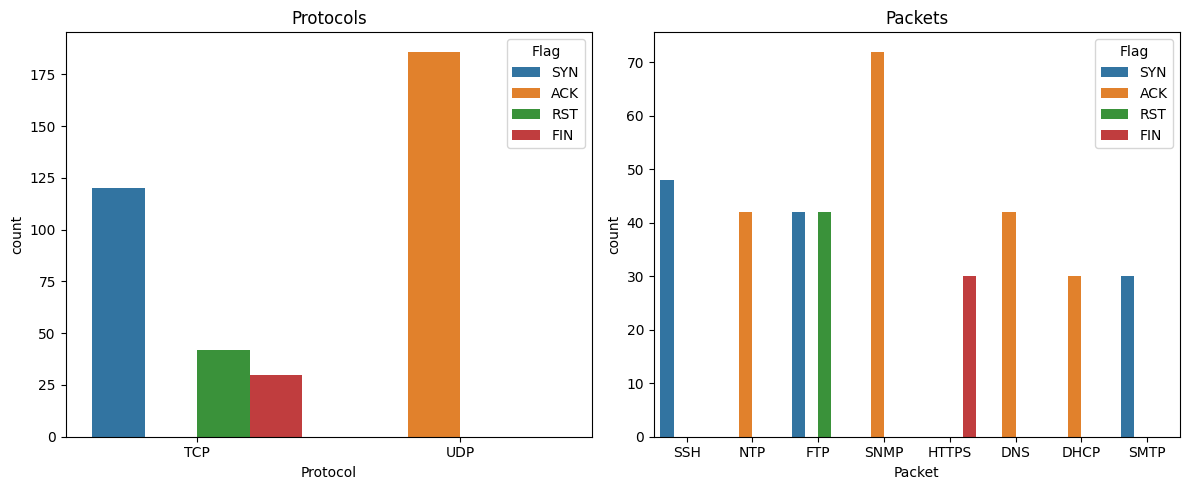

In [130]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=dataset, x="Protocol", hue="Flag")
plt.title('Protocols')

plt.subplot(1, 2, 2)
sns.countplot(data=dataset, x="Packet", hue="Flag")
plt.title('Packets')

plt.tight_layout()

plt.show()

*   The packets are using UDP protocol : **DHCP, DNS, SNMP, NTP**
*   The packets are using TCP protocol : **FTP, HTTPS, HTTP, SMTP, SSH**

*  **FIN** flag means the connection termination and only send by **HTTPS** packets.
*  **RST** flag means the immediate connection termination caused by unrecoverable errors, and only send by **FTP** packets.
*  **SYN** flag means the connection initialization, and send by **FTP**, **HTTP**, **SMTP** and SSH packets

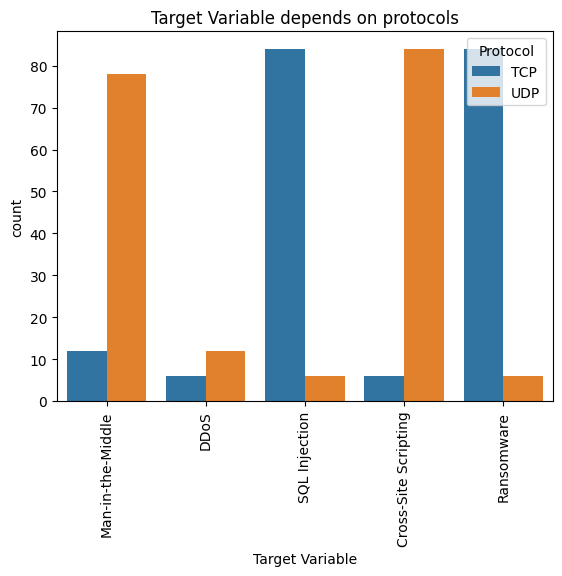

In [131]:
sns.countplot(data=dataset, x="Target Variable", hue="Protocol")
plt.title('Target Variable depends on protocols')
plt.xticks(rotation=90)

plt.show()

In [132]:
def make_pie_data(dataset, feature_1, feature_2):
    grouped_target = dataset.groupby(feature_1)
    grouped_packet = dataset.groupby(feature_2)
    targets = list(grouped_target.groups.keys())
    packets = list(grouped_packet.groups.keys())

    res = {}

    for t in targets:
        total_size = len(dataset[dataset[feature_1] == t])
        res[t] = {}

        for p in packets:
            partial_size = len(dataset[(dataset[feature_1] == t) & (dataset[feature_2] == p)])

            if partial_size != 0:
                res[t][p] = (total_size / 100) * partial_size

    return res

def draw_pie_plot(data):
  plt.figure(figsize=(18, 10))

  i = 1
  for target in data:
    packets = []
    rates = []
    for packet in data[target]:
      packets.append(packet)
      rates.append(data[target][packet])
    colors = sns.color_palette('pastel')[0:len(packets)]
    plt.subplot(3, 3, i)
    plt.pie(rates, labels = packets, colors = colors, autopct='%.0f%%')
    plt.title(f"{target}")
    i += 1
  plt.tight_layout()
  plt.show()

def draw_pie_plot_ports(data):
  plt.figure(figsize=(18, 15))

  i = 1
  for target in data:
    packets = []
    rates = []
    for packet in data[target]:
      packets.append(packet)
      rates.append(data[target][packet])
    colors = sns.color_palette('pastel')[0:len(packets)]
    plt.subplot(5, 5, i)
    plt.pie(rates, labels = packets, colors = colors, autopct='%.0f%%')
    plt.title(f"{target}")
    i += 1
  plt.tight_layout()
  plt.show()

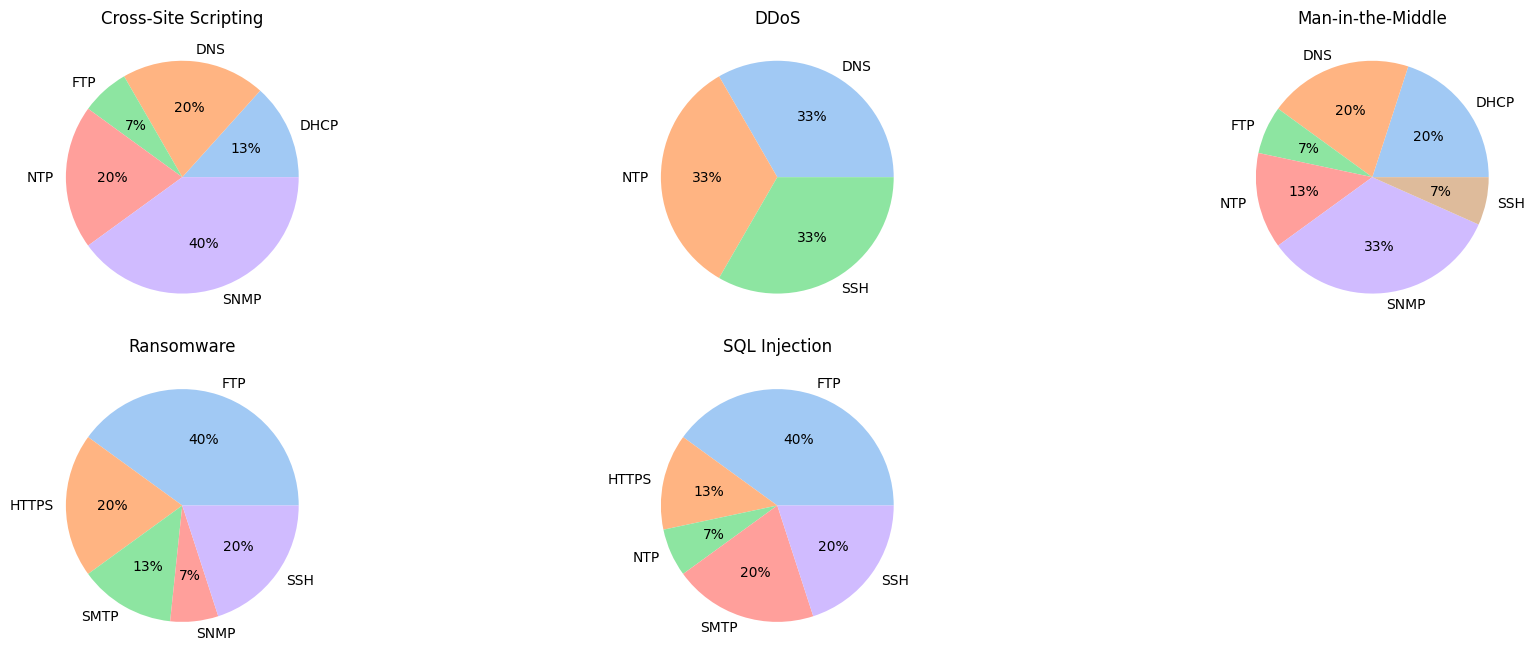

In [133]:
data = make_pie_data(dataset, "Target Variable", "Packet")
draw_pie_plot(data)

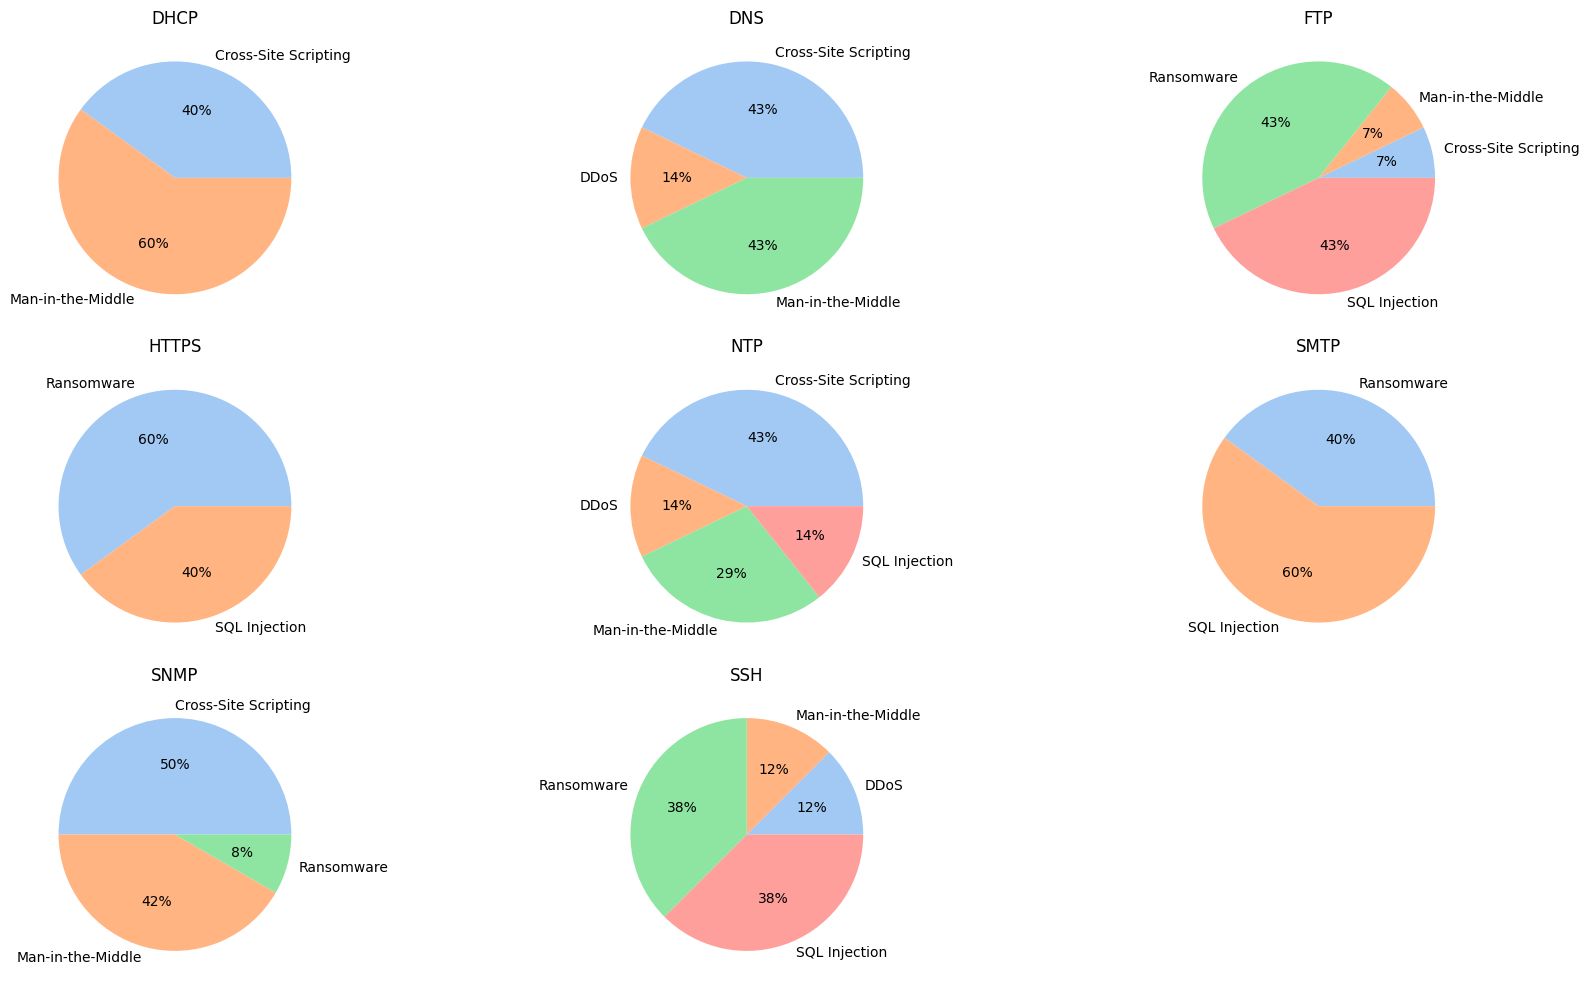

In [134]:
data = make_pie_data(dataset, "Packet", "Target Variable")
draw_pie_plot(data)

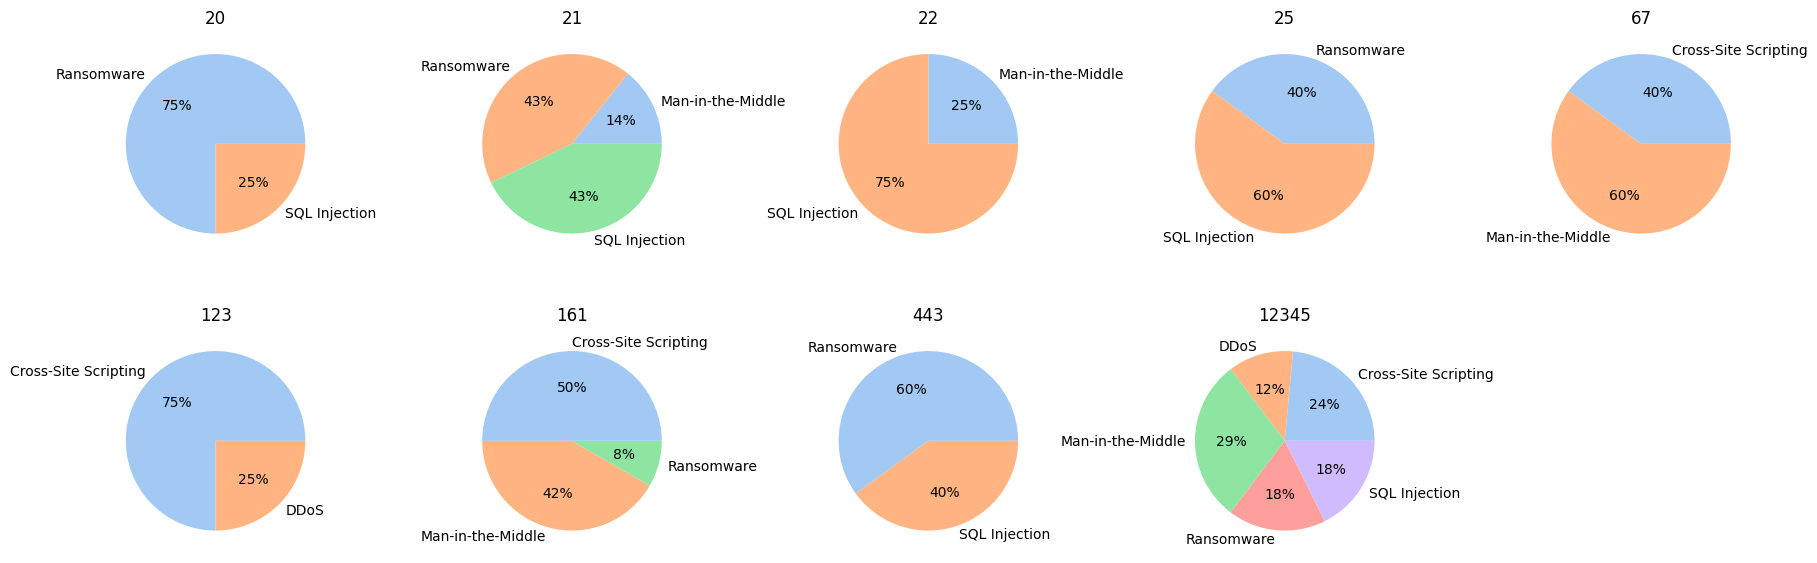

In [135]:
data = make_pie_data(dataset, "Source Port", "Target Variable")
draw_pie_plot_ports(data)

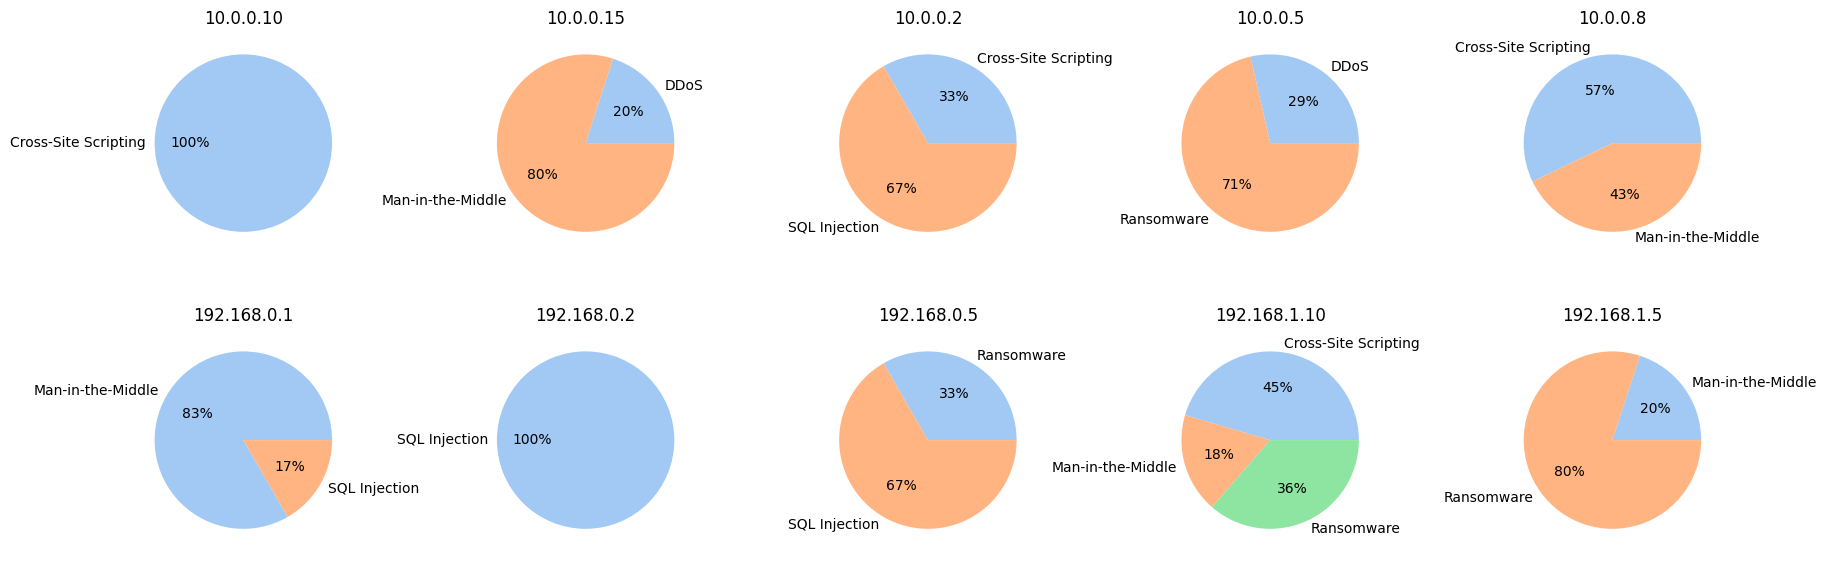

In [136]:
data = make_pie_data(dataset, "Source IP Address", "Target Variable")
draw_pie_plot_ports(data)

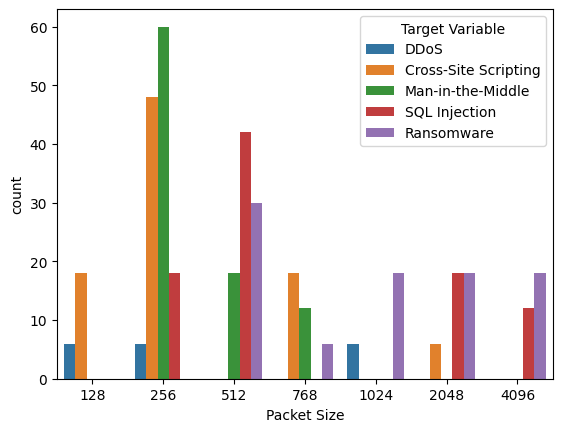

In [137]:
sns.countplot(data=dataset, x="Packet Size", hue="Target Variable")
plt.show()

It appears that all the features are categorical data. Let's convert them.

In [138]:
cols = dataset.columns

for col in cols:
  dataset[col] = dataset[col].astype("category")

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Protocol           378 non-null    category
 1   Flag               378 non-null    category
 2   Packet             378 non-null    category
 3   Sender ID          378 non-null    category
 4   Source IP Address  378 non-null    category
 5   Source Port        378 non-null    category
 6   Packet Size        378 non-null    category
 7   Target Variable    378 non-null    category
dtypes: category(8)
memory usage: 5.4 KB


## III - Data preprocessing :

Importing the necessary libraries:

In [139]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

Let's convert our categorical data into numerical values.

In [140]:
encoder = LabelEncoder()

for col in cols:
  dataset[col] = encoder.fit_transform(dataset[col])

dataset.head()

,Protocol,Flag,Packet,Sender ID,Source IP Address,Source Port,Packet Size,Target Variable
0,0,3,7,6,8,2,1,2
1,1,0,4,2,3,5,0,1
2,0,2,2,1,7,0,5,4
3,1,0,6,3,4,6,3,0
4,0,1,3,7,9,7,6,3


Extracting the features and the target:

In [141]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

Splitting our dataset into a training set and a test set:

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = True)

## IV - The model :

Importing the necessary libraries:

In [143]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

Our model is a neural network model with four dense layers: **two hidden layers** with **ReLU activation** functions, and an **output layer** with **softmax activation**. Our model is compiled with the **Adam optimizer**, **sparse categorical cross-entropy** loss, and **accuracy** as **the evaluation metric**. The input shape indicating our seven features.

In [144]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(7,)),
    Dense(49, activation='relu'),
    Dense(21, activation='relu'),
    Dense(5, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=1e-2),
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 64)                512       
                                                                 
 dense_21 (Dense)            (None, 49)                3185      
                                                                 
 dense_22 (Dense)            (None, 21)                1050      
                                                                 
 dense_23 (Dense)            (None, 5)                 110       
                                                                 
Total params: 4857 (18.97 KB)
Trainable params: 4857 (18.97 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## V - Training the model :

In [145]:
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


9/9 [==============================] - 2s 41ms/step - loss: 1.4572 - accuracy: 0.3674 - val_loss: 1.0934 - val_accuracy: 0.6667
Epoch 2/200
1/9 [==>...........................] - ETA: 0s - loss: 1.1129 - accuracy: 0.5000

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


9/9 [==============================] - 0s 15ms/step - loss: 1.0408 - accuracy: 0.6098 - val_loss: 0.8299 - val_accuracy: 0.7018
Epoch 3/200
9/9 [==============================] - 0s 10ms/step - loss: 0.8084 - accuracy: 0.7424 - val_loss: 0.7140 - val_accuracy: 0.7719
Epoch 4/200
9/9 [==============================] - 0s 10ms/step - loss: 0.6822 - accuracy: 0.7689 - val_loss: 0.6519 - val_accuracy: 0.7456
Epoch 5/200
9/9 [==============================] - 0s 10ms/step - loss: 0.5655 - accuracy: 0.8106 - val_loss: 0.5042 - val_accuracy: 0.8421
Epoch 6/200
9/9 [==============================] - 0s 12ms/step - loss: 0.4858 - accuracy: 0.8258 - val_loss: 0.4784 - val_accuracy: 0.8158
Epoch 7/200
9/9 [==============================] - 0s 11ms/step - loss: 0.4433 - accuracy: 0.8030 - val_loss: 0.4799 - val_accuracy: 0.7982
Epoch 8/200
9/9 [==============================] - 0s 11ms/step - loss: 0.3961 - accuracy: 0.8409 - val_loss: 0.3964 - val_accuracy: 0.8421
Epoch 9/200
9/9 [===============

## VII - Evaluation :

Importing the necessary libraries:

In [146]:
from sklearn.metrics import (confusion_matrix, classification_report)

In [147]:
loss, accuracy = model.evaluate(X_test, y_test)
accuracy

4/4 [==============================] - 0s 6ms/step - loss: 0.2109 - accuracy: 0.8772


0.8771929740905762

In [153]:
y_pred = model.predict(X_test)

y_pred[:5]

4/4 [==============================] - 0s 4ms/step


array([[4.77684580e-06, 7.05298667e-11, 1.08029371e-06, 3.62017900e-08,
        9.99994099e-01],
       [9.99996603e-01, 1.20380155e-11, 1.11623588e-09, 4.39506664e-07,
        2.83692066e-06],
       [1.14718487e-03, 4.90736158e-04, 7.04880476e-01, 2.37624714e-04,
        2.93244064e-01],
       [2.61072746e-05, 2.77375220e-04, 9.99694347e-01, 5.84534575e-07,
        1.52174005e-06],
       [8.23467872e-08, 2.20519973e-06, 9.99975264e-01, 5.27031034e-06,
        1.71387801e-05]], dtype=float32)

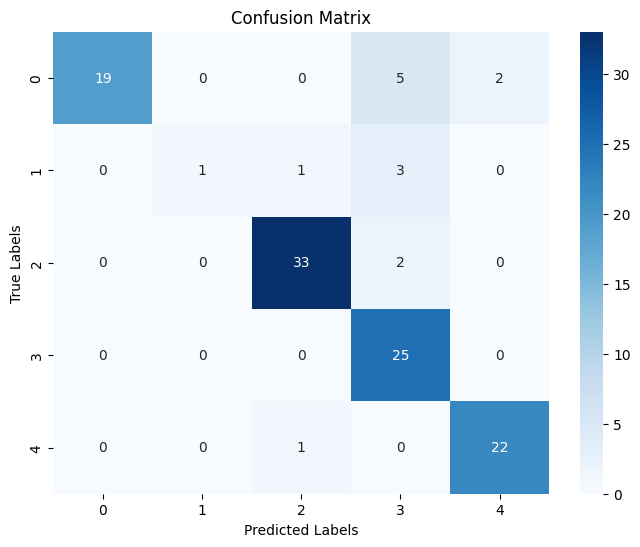

In [155]:
predicted_labels = np.argmax(y_pred, axis=1)


conf_matrix = confusion_matrix(y_test, predicted_labels)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [151]:
print(classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        26
           1       1.00      0.20      0.33         5
           2       0.94      0.94      0.94        35
           3       0.71      1.00      0.83        25
           4       0.92      0.96      0.94        23

    accuracy                           0.88       114
   macro avg       0.91      0.77      0.78       114
weighted avg       0.90      0.88      0.87       114

